# Data Transformation

### The starting datasets are combined and transformed for analysis and machine learning

#### This first section will transform the original datasets for a first analysis. 
The starting sets are `Rapporti_di_lavoro_attivati.csv` and `Rapporti_di_lavoro_prorogati.csv`. The two datasets are concatenated, since extended contracts can be seen as activated contracts, and then we consider two separated datasets, one for 2018-2019 and one for 2020-2021.
The data are concatenated, divided and cleaned up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import preprocessing
from math import isnan

Import the two datasets

In [2]:
activatedContractsPath = "C:\\Users\\rotol\\Downloads\\csvs\\Rapporti_di_lavoro_attivati.csv"
extendedContractsPath = "C:\\Users\\rotol\\Downloads\\csvs\\Rapporti_di_lavoro_prorogati.csv"

In [3]:
activatedContracts = pd.read_csv(activatedContractsPath)
activatedContracts

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
...,...,...,...,...,...,...,...,...,...
9579789,01/03/2020,M,52,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
9579790,06/09/2010,M,61,Lavori di meccanica generale,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ALBANIA
9579791,06/11/2021,M,37,Fabbricazione di parti ed accessori per bicicl...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,SENEGAL
9579792,02/02/2010,M,35,Fabbricazione di parti ed accessori per bicicl...,LICENZA MEDIA,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,TEMPO PIENO,BERGAMO,SENEGAL


In [4]:
extendedContracts = pd.read_csv(extendedContractsPath)
extendedContracts

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,10/01/2020,F,48,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
1,01/03/2013,M,56,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,09/10/2018,M,58,Rifugi di montagna,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIA
3,10/04/2017,M,41,Realizzazione di coperture,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,MAROCCO
4,03/01/2010,M,56,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
...,...,...,...,...,...,...,...,...,...
3413612,04/09/2018,F,50,Installazione di altre macchine ed apparecchia...,LICENZA ELEMENTARE,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIA
3413613,12/10/2018,F,52,Mense,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIA
3413614,01/10/2017,F,37,Servizi integrati di gestione agli edifici,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BRESCIA,ITALIA
3413615,11/07/2019,M,36,Installazione di impianti elettrici in edifici...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA


Concatenate the two sets

In [5]:
concatDataset = pd.concat([activatedContracts, extendedContracts], ignore_index=True)
concatDataset

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
...,...,...,...,...,...,...,...,...,...
12993406,04/09/2018,F,50,Installazione di altre macchine ed apparecchia...,LICENZA ELEMENTARE,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIA
12993407,12/10/2018,F,52,Mense,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIA
12993408,01/10/2017,F,37,Servizi integrati di gestione agli edifici,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BRESCIA,ITALIA
12993409,11/07/2019,M,36,Installazione di impianti elettrici in edifici...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA


When talking about italian labour market, we are usually interested only in dividing italians from foreigners. For this reason,
the "ITALIANO" column is substituted by a "CITTADINANZA" column containing the values "ITALIANO" and "STRANIERO".

First we make sure that there are no NaN values.

In [6]:
concatDataset.ITALIANO.isna().unique().tolist()

[False]

In [7]:
concatDataset.ITALIANO[concatDataset.ITALIANO == 'NON DEFINITO'].unique().tolist()

[]

Then we change the value

In [8]:
concatDataset.rename(columns={"ITALIANO":"CITTADINANZA"}, inplace=True)
condition = concatDataset.CITTADINANZA == "ITALIA"
concatDataset.loc[-condition, 'CITTADINANZA'] = "STRANIERO"
concatDataset.loc[condition, 'CITTADINANZA'] = "ITALIANO"
concatDataset.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,STRANIERO
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIANO
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIANO
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIANO


In order to obtain the two final sets we need to transform the DATA attribute into date type.

In [9]:
concatDataset.DATA = pd.to_datetime(concatDataset.DATA)
concatDataset.DATA

0          2020-09-05
1          2019-12-07
2          2013-05-06
3          2010-12-03
4          2021-06-04
              ...    
12993406   2018-04-09
12993407   2018-12-10
12993408   2017-01-10
12993409   2019-11-07
12993410   2021-04-07
Name: DATA, Length: 12993411, dtype: datetime64[ns]

We check for invalid dates.

In [10]:
futureDate = concatDataset[concatDataset.DATA > "2021/12/31"]
futureDate

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
5840160,2201-06-09,M,221,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,MILANO,STRANIERO


This is probably just a typo (2201 instead of 2021). We can edit it by changing the date and the related age.

In [11]:
concatDataset.loc[concatDataset.DATA > "2021-12-31", ["ETA"]] = 221-(2201-2021)
concatDataset.loc[concatDataset.DATA > "2021-12-31", ["DATA"]] = np.datetime64("2021-06-09")
len(concatDataset[concatDataset.DATA > "2021-12-31"])

0

Now divide in the two dataset to consider (2018-2019) and (2020-2021)

In [12]:
contract_1819 = concatDataset[(concatDataset.DATA > '2017-12-31')&(concatDataset.DATA < '2020-01-01')]
contract_1819.reset_index(inplace=True)
contract_1819 = contract_1819.drop(labels=['DATA'], axis=1)
contract_1819 = contract_1819.drop(labels=['index'], axis=1)
'''Create copy'''
contract_1819_copy = contract_1819.copy(deep=True)
contract_1819

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
1,F,56,Confezioni di abbigliamento sportivo o di altr...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIANO
2,F,34,Istruzione di grado preparatorio: scuole dell'...,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIANO
3,M,54,Allevamento di bovini e bufalini da carne,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE MISTO,BERGAMO,STRANIERO
4,F,45,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,ITALIANO
...,...,...,...,...,...,...,...,...
2597479,F,28,Altre attività di assistenza sociale non resid...,DIPLOMA UNIVERSITARIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MONZA E BRIANZA,ITALIANO
2597480,F,34,Mense,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,STRANIERO
2597481,F,50,Installazione di altre macchine ed apparecchia...,LICENZA ELEMENTARE,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIANO
2597482,F,52,Mense,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIANO


In [13]:
contract_2021 = concatDataset[concatDataset.DATA > '2019-12-31']
contract_2021.reset_index(inplace=True)
contract_2021 = contract_2021.drop(labels=['DATA'], axis=1)
contract_2021 = contract_2021.drop(labels=['index'], axis=1)
'''Create copy'''
contract_2021_copy = contract_2021.copy(deep=True)
contract_2021

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,STRANIERO
1,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIANO
2,M,16,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
3,M,19,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIANO
4,M,37,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
...,...,...,...,...,...,...,...,...
1903752,M,21,Servizi logistici relativi alla distribuzione ...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,STRANIERO
1903753,M,49,Pulizia generale (non specializzata) di edifici,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MONZA E BRIANZA,ITALIANO
1903754,F,56,Fabbricazione di altri articoli metallici e mi...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MONZA E BRIANZA,ITALIANO
1903755,F,60,Altre attività di assistenza sociale non resid...,LICENZA MEDIA,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MONZA E BRIANZA,ITALIANO


Now we look for NaN or undefined values and try to clean them up. First for 2018-2019.

For GENERE there are no NaN values

In [14]:
contract_1819.GENERE.unique().tolist()

['M', 'F']

For ETA there are no NaN values but there are ages below 15, which are non valid values

In [15]:
contract_1819.ETA.isna().unique().tolist()

[False]

In [16]:
contract_1819[contract_1819.ETA < 15]['ETA'].unique().tolist()

[8, 9, 1, 7, 3, 14, 0, 5, 10, 11, 13, 12, 6, 2, 4]

In [17]:
conditionA = contract_1819.ETA < 15
print("Number of tuples without a 'ETA' value lower than 15: ", len(contract_1819[conditionA]), ",",(len(contract_1819[conditionA])/len(contract_1819.ETA))*100,"%")

Number of tuples without a 'ETA' value lower than 15:  2103 , 0.08096296262075146 %


Even though the total number of invalid values is less than 1% of the total, we need to check if there are some categories that could lose more than 1% of their data.

In [18]:
print('Check categories')
percentages_1819 = []
print('GENERE')
percentages_1819.append((len(contract_1819[(contract_1819.GENERE=='M')&(conditionA)])/len(contract_1819[contract_1819.GENERE=='M']))*100)
percentages_1819.append((len(contract_1819[(contract_1819.GENERE=='F')&(conditionA)])/len(contract_1819[contract_1819.GENERE=='F']))*100)

print('SETTOREECONOMICODETTAGLIO')
for i in contract_1819.SETTOREECONOMICODETTAGLIO.unique().tolist():
    if type(i) is str:
        percentages_1819.append((len(contract_1819[(contract_1819.SETTOREECONOMICODETTAGLIO==i)&(conditionA)])/len(contract_1819[contract_1819.SETTOREECONOMICODETTAGLIO==i]))*100)
    elif isnan(i):
        percentages_1819.append((len(contract_1819[(contract_1819.SETTOREECONOMICODETTAGLIO.isna())&(conditionA)])/len(contract_1819[contract_1819.SETTOREECONOMICODETTAGLIO.isna()]))*100)

print('TITOLOSTUDIO')
for i in contract_1819.TITOLOSTUDIO.unique().tolist():
    percentages_1819.append((len(contract_1819[(contract_1819.TITOLOSTUDIO==i)&(conditionA)])/len(contract_1819[contract_1819.TITOLOSTUDIO==i]))*100)

print('CONTRATTO')
for i in contract_1819.CONTRATTO.unique().tolist():
    percentages_1819.append((len(contract_1819[(contract_1819.CONTRATTO==i)&(conditionA)])/len(contract_1819[contract_1819.CONTRATTO==i]))*100)

print('MODALITALAVORO')
for i in contract_1819.MODALITALAVORO.unique().tolist():
    percentages_1819.append((len(contract_1819[(contract_1819.MODALITALAVORO==i)&(conditionA)])/len(contract_1819[contract_1819.MODALITALAVORO==i]))*100)

print('PROVINCIAIMPRESA')
for i in contract_1819.PROVINCIAIMPRESA.unique().tolist():
    percentages_1819.append((len(contract_1819[(contract_1819.PROVINCIAIMPRESA==i)&(conditionA)])/len(contract_1819[contract_1819.PROVINCIAIMPRESA==i]))*100)
    
print('CITTADINANZA')
for i in contract_1819.CITTADINANZA.unique().tolist():
    percentages_1819.append((len(contract_1819[(contract_1819.CITTADINANZA==i)&(conditionA)])/len(contract_1819[contract_1819.CITTADINANZA==i]))*100)

ctr = 0
printed = False
for i in percentages_1819:
    if i >= 1:
        print('There is one categories that would lose more than 1%: ', ctr)
        printed = True
    ctr = ctr + 1
    if ctr == len(percentages_1819) and not printed:
        print('No category would lose more than 1%, so we can eliminate invalid values')


Check categories
GENERE
SETTOREECONOMICODETTAGLIO
TITOLOSTUDIO
CONTRATTO
MODALITALAVORO
PROVINCIAIMPRESA
CITTADINANZA
There is one categories that would lose more than 1%:  428
There is one categories that would lose more than 1%:  1040


Since we cannot eliminate the invalid values, We can just consider them as undefined values.

In [19]:
contract_1819.loc[conditionA, 'ETA'] = 0

Now we can categorize the age into five categories: NON DEFINITO, 15-24, 25-49, 50-64, 65 o piu'

In [20]:
'''First the age values are substituted with values 0,1,2,3,4 (from "ND", "15-24" to "65 o piu'"), then they are changed with the
actual names'''
contract_1819.loc[contract_1819.ETA < 15, 'ETA'] = 0
contract_1819.loc[(contract_1819.ETA > 14) & (contract_1819.ETA < 25), 'ETA'] = 1
contract_1819.loc[(contract_1819.ETA > 24) & (contract_1819.ETA < 50), 'ETA'] = 2
contract_1819.loc[(contract_1819.ETA > 49) & (contract_1819.ETA < 65), 'ETA'] = 3
contract_1819.loc[contract_1819.ETA > 64, 'ETA'] = 4

contract_1819 = contract_1819.replace({0:"NON DEFINITO", 1:"15-24", 2:"25-49", 3:"50-64", 4:"65 o piu'"})
contract_1819.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,M,25-49,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
1,F,50-64,Confezioni di abbigliamento sportivo o di altr...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIANO
2,F,25-49,Istruzione di grado preparatorio: scuole dell'...,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIANO
3,M,50-64,Allevamento di bovini e bufalini da carne,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE MISTO,BERGAMO,STRANIERO
4,F,25-49,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,ITALIANO


For SETTOREECONOMICODETTAGLIO there are NaN values so we do what it was done for ETA

In [21]:
contract_1819.SETTOREECONOMICODETTAGLIO.isna().unique().tolist()

[False, True]

In [22]:
contract_1819.SETTOREECONOMICODETTAGLIO[contract_1819.SETTOREECONOMICODETTAGLIO == 'NON DEFINITO'].unique().tolist()

[]

In [23]:
conditionA = contract_1819.SETTOREECONOMICODETTAGLIO.isna()
print("Number of tuples with a NaN value for SETTOREECONOMICODETTAGLIO: ", len(contract_1819[conditionA]), ",",(len(contract_1819[conditionA])/len(contract_1819.SETTOREECONOMICODETTAGLIO))*100,"%")

Number of tuples with a NaN value for SETTOREECONOMICODETTAGLIO:  1188 , 0.045736566616002255 %


In [24]:
print('Check categories')
percentages_1819 = []
print('GENERE')
percentages_1819.append((len(contract_1819[(contract_1819.GENERE=='M')&(conditionA)])/len(contract_1819[contract_1819.GENERE=='M']))*100)
percentages_1819.append((len(contract_1819[(contract_1819.GENERE=='F')&(conditionA)])/len(contract_1819[contract_1819.GENERE=='F']))*100)

print('ETA')
for i in contract_1819.ETA.unique().tolist():
    percentages_1819.append((len(contract_1819[(contract_1819.ETA==i)&(conditionA)])/len(contract_1819[contract_1819.ETA==i]))*100)

print('TITOLOSTUDIO')
for i in contract_1819.TITOLOSTUDIO.unique().tolist():
    percentages_1819.append((len(contract_1819[(contract_1819.TITOLOSTUDIO==i)&(conditionA)])/len(contract_1819[contract_1819.TITOLOSTUDIO==i]))*100)

print('CONTRATTO')
for i in contract_1819.CONTRATTO.unique().tolist():
    percentages_1819.append((len(contract_1819[(contract_1819.CONTRATTO==i)&(conditionA)])/len(contract_1819[contract_1819.CONTRATTO==i]))*100)

print('MODALITALAVORO')
for i in contract_1819.MODALITALAVORO.unique().tolist():
    percentages_1819.append((len(contract_1819[(contract_1819.MODALITALAVORO==i)&(conditionA)])/len(contract_1819[contract_1819.MODALITALAVORO==i]))*100)

print('PROVINCIAIMPRESA')
for i in contract_1819.PROVINCIAIMPRESA.unique().tolist():
    percentages_1819.append((len(contract_1819[(contract_1819.PROVINCIAIMPRESA==i)&(conditionA)])/len(contract_1819[contract_1819.PROVINCIAIMPRESA==i]))*100)
    
print('CITTADINANZA')
for i in contract_1819.CITTADINANZA.unique().tolist():
    percentages_1819.append((len(contract_1819[(contract_1819.CITTADINANZA==i)&(conditionA)])/len(contract_1819[contract_1819.CITTADINANZA==i]))*100)
    
ctr = 0
printed = False
for i in percentages_1819:
    if i >= 1:
        print('There is one categories that would lose more than 1%: ', ctr)
        printed = True
    ctr = ctr + 1
    if ctr == len(percentages_1819) and not printed:
        print('No category would lose more than 1%, so we can eliminate invalid values')

Check categories
GENERE
ETA
TITOLOSTUDIO
CONTRATTO
MODALITALAVORO
PROVINCIAIMPRESA
CITTADINANZA
No category would lose more than 1%, so we can eliminate invalid values


We can eliminate all tuples with a NaN value

In [25]:
contract_1819 = contract_1819.drop(contract_1819[contract_1819.SETTOREECONOMICODETTAGLIO.isna()].index)
print('Number of NaN values:',len(contract_1819_copy.SETTOREECONOMICODETTAGLIO[conditionA]))
print('Elements removed:',len(contract_1819_copy.SETTOREECONOMICODETTAGLIO)-len(contract_1819.SETTOREECONOMICODETTAGLIO))

Number of NaN values: 1188
Elements removed: 1188


For TITOLOSTUDIO there are no NaN values

In [26]:
contract_1819.TITOLOSTUDIO.unique().tolist()

['LICENZA MEDIA',
 'LAUREA - Vecchio o nuovo ordinamento',
 'NESSUN TITOLO DI STUDIO',
 "DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA",
 "TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()",
 'LICENZA ELEMENTARE',
 'DIPLOMA UNIVERSITARIO',
 'TITOLO DI STUDIO POST-LAUREA',
 'DIPLOMA DI SPECIALIZZAZIONE',
 'MASTER UNIVERSITARIO DI PRIMO LIVELLO',
 'DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO',
 'TITOLO DI DOTTORE DI RICERCA']

In [27]:
contract_1819.TITOLOSTUDIO.isna().unique().tolist()

[False]

 We can group up some educational degrees that are on the same level, like different types of bachelor's degree and all post-lauream degrees.

In [28]:
replaceDict = {"NESSUN TITOLO DI STUDIO":0,
              "LICENZA ELEMENTARE":1,
              "LICENZA MEDIA":2,
              "TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()":3,
              "DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA":4,
              "LAUREA - Vecchio o nuovo ordinamento":5,
              "DIPLOMA UNIVERSITARIO":5,
              "DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO":5,
              "DIPLOMA DI SPECIALIZZAZIONE":6,
              "TITOLO DI DOTTORE DI RICERCA":6,
              "TITOLO DI STUDIO POST-LAUREA":6,
              "MASTER UNIVERSITARIO DI PRIMO LIVELLO":6}

contract_1819.replace({"TITOLOSTUDIO":replaceDict}, inplace=True)
contract_1819.TITOLOSTUDIO = contract_1819.TITOLOSTUDIO.replace({0:"NESSUN TITOLO DI STUDIO", 
                                       1:"LICENZA ELEMENTARE",
                                       2:"LICENZA MEDIA",
                                       3:"ISTRUZIONE SECONDARIA SUPERIORE SENZA ACCESSO A UNIVERSITA'", 
                                       4:"ISTRUZIONE SECONDARIA SUPERIORE CON ACCESSO A UNIVERSITA'", 
                                       5:"ISTRUZIONE TERZIARIA", 
                                       6:"ISTRUZIONE POST-LAUREAM"})
contract_1819.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,M,25-49,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
1,F,50-64,Confezioni di abbigliamento sportivo o di altr...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIANO
2,F,25-49,Istruzione di grado preparatorio: scuole dell'...,ISTRUZIONE TERZIARIA,LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIANO
3,M,50-64,Allevamento di bovini e bufalini da carne,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE MISTO,BERGAMO,STRANIERO
4,F,25-49,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,ITALIANO


For CONTRATTO there are no NaN values

In [29]:
contract_1819.CONTRATTO.unique().tolist()

['LAVORO A TEMPO DETERMINATO',
 'LAVORO A TEMPO INDETERMINATO',
 'LAVORO DOMESTICO',
 'LAVORO INTERMITTENTE',
 'TIROCINIO',
 'LAVORO AUTONOMO NELLO SPETTACOLO',
 'APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE',
 'LAVORO A TEMPO DETERMINATO  PER SOSTITUZIONE',
 'LAVORO A DOMICILIO',
 'CONTRATTO DI AGENZIA',
 'APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE',
 'COLLABORAZIONE COORDINATA E CONTINUATIVA',
 'LAVORO O ATTIVITÀ SOCIALMENTE UTILE (LSU - ASU)',
 'APPRENDISTATO DI ALTA FORMAZIONE E RICERCA',
 'CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES',
 'CONTRATTO DI FORMAZIONE LAVORO (SOLO PUBBLICA AMMINISTRAZIONE)',
 'LAVORO CONGIUNTO IN AGRICOLTURA',
 'LAVORO RIPARTITO',
 'LAVORO DOMESTICO A TEMPO INDETERMINATO']

In [30]:
contract_1819.CONTRATTO.isna().unique().tolist()

[False]

For MODALITALAVORO there are undefined values, but we cannot eliminate them because they represent more than 9% of the total data

In [31]:
contract_1819.MODALITALAVORO.unique().tolist()

['TEMPO PIENO',
 'TEMPO PARZIALE ORIZZONTALE',
 'TEMPO PARZIALE MISTO',
 'NON DEFINITO',
 'TEMPO PARZIALE VERTICALE']

In [32]:
conditionA = contract_1819.MODALITALAVORO == 'NON DEFINITO'
print("Number of tuples with a NaN value for SETTOREECONOMICODETTAGLIO: ", len(contract_1819[conditionA]), ",",(len(contract_1819[conditionA])/len(contract_1819.MODALITALAVORO))*100,"%")

Number of tuples with a NaN value for SETTOREECONOMICODETTAGLIO:  250511 , 9.64878426804956 %


For PROVINCIAIMPRESA there are no NaN values, and CITTADINANZA was already checked before.

In [33]:
contract_1819.PROVINCIAIMPRESA.unique().tolist()

['BERGAMO',
 'LECCO',
 'BRESCIA',
 'COMO',
 'LODI',
 'MANTOVA',
 'CREMONA',
 'PAVIA',
 'MILANO',
 'VARESE',
 'SONDRIO',
 'MONZA E BRIANZA']

No we repeat the same process for the data from 2020-2021

For GENERE there are no NaN values

In [34]:
contract_2021.GENERE.unique().tolist()

['F', 'M']

For ETA there are invalid values

In [35]:
contract_2021.ETA.isna().unique().tolist()

[False]

In [36]:
contract_2021[contract_2021.ETA < 15]['ETA'].unique().tolist()

[4, 0, 2, 8, 5, 6, 10, 9, 11, 12, 14, 7, 1, 3, 13]

In [37]:
conditionA = contract_2021.ETA < 15
print("Number of tuples without a 'ETA' value lower than 15: ", len(contract_2021[conditionA]), ",",(len(contract_2021[conditionA])/len(contract_2021.ETA))*100,"%")

Number of tuples without a 'ETA' value lower than 15:  1670 , 0.08772127955406073 %


In [38]:
print('Check categories')
percentages_2021 = []
print('GENERE')
percentages_2021.append((len(contract_2021[(contract_2021.GENERE=='M')&(conditionA)])/len(contract_2021[contract_2021.GENERE=='M']))*100)
percentages_2021.append((len(contract_2021[(contract_2021.GENERE=='F')&(conditionA)])/len(contract_2021[contract_2021.GENERE=='F']))*100)

print('SETTOREECONOMICODETTAGLIO')
for i in contract_2021.SETTOREECONOMICODETTAGLIO.unique().tolist():
    if type(i) is str:
        percentages_2021.append((len(contract_2021[(contract_2021.SETTOREECONOMICODETTAGLIO==i)&(conditionA)])/len(contract_2021[contract_2021.SETTOREECONOMICODETTAGLIO==i]))*100)
    elif isnan(i):
        percentages_2021.append((len(contract_2021[(contract_2021.SETTOREECONOMICODETTAGLIO.isna())&(conditionA)])/len(contract_2021[contract_2021.SETTOREECONOMICODETTAGLIO.isna()]))*100)

print('TITOLOSTUDIO')
for i in contract_2021.TITOLOSTUDIO.unique().tolist():
    percentages_2021.append((len(contract_2021[(contract_2021.TITOLOSTUDIO==i)&(conditionA)])/len(contract_2021[contract_2021.TITOLOSTUDIO==i]))*100)

print('CONTRATTO')
for i in contract_2021.CONTRATTO.unique().tolist():
    percentages_2021.append((len(contract_2021[(contract_2021.CONTRATTO==i)&(conditionA)])/len(contract_2021[contract_2021.CONTRATTO==i]))*100)

print('MODALITALAVORO')
for i in contract_2021.MODALITALAVORO.unique().tolist():
    percentages_2021.append((len(contract_2021[(contract_2021.MODALITALAVORO==i)&(conditionA)])/len(contract_2021[contract_2021.MODALITALAVORO==i]))*100)

print('PROVINCIAIMPRESA')
for i in contract_2021.PROVINCIAIMPRESA.unique().tolist():
    percentages_2021.append((len(contract_2021[(contract_2021.PROVINCIAIMPRESA==i)&(conditionA)])/len(contract_2021[contract_2021.PROVINCIAIMPRESA==i]))*100)
    
print('CITTADINANZA')
for i in contract_2021.CITTADINANZA.unique().tolist():
    percentages_2021.append((len(contract_2021[(contract_2021.CITTADINANZA==i)&(conditionA)])/len(contract_2021[contract_2021.CITTADINANZA==i]))*100)
    
ctr = 0
printed = False
for i in percentages_2021:
    if i >= 1:
        print('There is one categories that would lose more than 1%: ', ctr)
        printed = True
    ctr = ctr + 1
    if ctr == len(percentages_2021) and not printed:
        print('No category would lose more than 1%, so we can eliminate invalid values')


Check categories
GENERE
SETTOREECONOMICODETTAGLIO
TITOLOSTUDIO
CONTRATTO
MODALITALAVORO
PROVINCIAIMPRESA
CITTADINANZA
There is one categories that would lose more than 1%:  459
There is one categories that would lose more than 1%:  488
There is one categories that would lose more than 1%:  770
There is one categories that would lose more than 1%:  786
There is one categories that would lose more than 1%:  790
There is one categories that would lose more than 1%:  845
There is one categories that would lose more than 1%:  945
There is one categories that would lose more than 1%:  986
There is one categories that would lose more than 1%:  1192


As before, the values cannot be eliminated so we consider them as undefined values

In [39]:
contract_2021.loc[conditionA, 'ETA'] = 0

We group the values: NON DEFINITO, 15-24, 25-49, 50-64, 65 o piu'

In [40]:
'''First the age values are substituted with values 0,1,2,3,4 (from "ND", "15-24" to "65 o piu'"), then they are changed with the
actual names'''
contract_2021.loc[contract_2021.ETA < 15, 'ETA'] = 0
contract_2021.loc[(contract_2021.ETA > 14) & (contract_2021.ETA < 25), 'ETA'] = 1
contract_2021.loc[(contract_2021.ETA > 24) & (contract_2021.ETA < 50), 'ETA'] = 2
contract_2021.loc[(contract_2021.ETA > 49) & (contract_2021.ETA < 65), 'ETA'] = 3
contract_2021.loc[contract_2021.ETA > 64, 'ETA'] = 4

contract_2021 = contract_2021.replace({0:"NON DEFINITO", 1:"15-24", 2:"25-49", 3:"50-64", 4:"65 o piu'"})
contract_2021.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,F,50-64,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,STRANIERO
1,F,25-49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIANO
2,M,15-24,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
3,M,15-24,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIANO
4,M,25-49,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO


For SETTOREECONOMICODETTAGLIO there are NaN values

In [41]:
contract_2021.SETTOREECONOMICODETTAGLIO.isna().unique().tolist()

[False, True]

In [42]:
contract_2021.SETTOREECONOMICODETTAGLIO[contract_2021.SETTOREECONOMICODETTAGLIO == 'NON DEFINITO'].unique().tolist()

[]

We do the same as before

In [43]:
conditionA = contract_2021.SETTOREECONOMICODETTAGLIO.isna()
print("Number of tuples with a NaN value for SETTOREECONOMICODETTAGLIO: ", len(contract_2021[conditionA]), ",",(len(contract_2021[conditionA])/len(contract_2021.SETTOREECONOMICODETTAGLIO))*100,"%")

Number of tuples with a NaN value for SETTOREECONOMICODETTAGLIO:  1210 , 0.06355853189246316 %


In [44]:
print('Check categories')
percentages_2021 = []
print('GENERE')
percentages_2021.append((len(contract_2021[(contract_2021.GENERE=='M')&(conditionA)])/len(contract_2021[contract_2021.GENERE=='M']))*100)
percentages_2021.append((len(contract_2021[(contract_2021.GENERE=='F')&(conditionA)])/len(contract_2021[contract_2021.GENERE=='F']))*100)

print('ETA')
for i in contract_2021.ETA.unique().tolist():
    percentages_2021.append((len(contract_2021[(contract_2021.ETA==i)&(conditionA)])/len(contract_2021[contract_2021.ETA==i]))*100)

print('TITOLOSTUDIO')
for i in contract_2021.TITOLOSTUDIO.unique().tolist():
    percentages_2021.append((len(contract_2021[(contract_2021.TITOLOSTUDIO==i)&(conditionA)])/len(contract_2021[contract_2021.TITOLOSTUDIO==i]))*100)

print('CONTRATTO')
for i in contract_2021.CONTRATTO.unique().tolist():
    percentages_2021.append((len(contract_2021[(contract_2021.CONTRATTO==i)&(conditionA)])/len(contract_2021[contract_2021.CONTRATTO==i]))*100)

print('MODALITALAVORO')
for i in contract_2021.MODALITALAVORO.unique().tolist():
    percentages_2021.append((len(contract_2021[(contract_2021.MODALITALAVORO==i)&(conditionA)])/len(contract_2021[contract_2021.MODALITALAVORO==i]))*100)

print('PROVINCIAIMPRESA')
for i in contract_2021.PROVINCIAIMPRESA.unique().tolist():
    percentages_2021.append((len(contract_2021[(contract_2021.PROVINCIAIMPRESA==i)&(conditionA)])/len(contract_2021[contract_2021.PROVINCIAIMPRESA==i]))*100)
    
print('CITTADINANZA')
for i in contract_2021.CITTADINANZA.unique().tolist():
    percentages_2021.append((len(contract_2021[(contract_2021.CITTADINANZA==i)&(conditionA)])/len(contract_2021[contract_2021.CITTADINANZA==i]))*100)
    
ctr = 0
printed = False
for i in percentages_2021:
    if i >= 1:
        print('There is one categories that would lose more than 1%: ', ctr)
        printed = True
    ctr = ctr + 1
    if ctr == len(percentages_2021) and not printed:
        print('No category would lose more than 1%, so we can eliminate invalid values')


Check categories
GENERE
ETA
TITOLOSTUDIO
CONTRATTO
MODALITALAVORO
PROVINCIAIMPRESA
CITTADINANZA
There is one categories that would lose more than 1%:  47


In this case we cannot eliminate the NaN values so we consider them as undefined values.

In [45]:
contract_2021.loc[conditionA, 'SETTOREECONOMICODETTAGLIO'] = 'NON DEFINITO'

For TITOLOSTUDIO there are no NaN values

In [46]:
contract_2021.TITOLOSTUDIO.unique().tolist()

['NESSUN TITOLO DI STUDIO',
 'LICENZA MEDIA',
 'LICENZA ELEMENTARE',
 "TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()",
 "DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA",
 'DIPLOMA DI SPECIALIZZAZIONE',
 'DIPLOMA UNIVERSITARIO',
 'LAUREA - Vecchio o nuovo ordinamento',
 'TITOLO DI DOTTORE DI RICERCA',
 'MASTER UNIVERSITARIO DI PRIMO LIVELLO',
 'TITOLO DI STUDIO POST-LAUREA',
 'DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO']

In [47]:
contract_2021.TITOLOSTUDIO.isna().unique().tolist()

[False]

TITOLOSTUDIO values are grouped up as before

In [48]:
replaceDict = {"NESSUN TITOLO DI STUDIO":0,
              "LICENZA ELEMENTARE":1,
              "LICENZA MEDIA":2,
              "TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()":3,
              "DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA":4,
              "LAUREA - Vecchio o nuovo ordinamento":5,
              "DIPLOMA UNIVERSITARIO":5,
              "DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO":5,
              "DIPLOMA DI SPECIALIZZAZIONE":6,
              "TITOLO DI DOTTORE DI RICERCA":6,
              "TITOLO DI STUDIO POST-LAUREA":6,
              "MASTER UNIVERSITARIO DI PRIMO LIVELLO":6}

contract_2021.replace({"TITOLOSTUDIO":replaceDict}, inplace=True)
contract_2021.TITOLOSTUDIO = contract_2021.TITOLOSTUDIO.replace({0:"NESSUN TITOLO DI STUDIO", 
                                       1:"LICENZA ELEMENTARE",
                                       2:"LICENZA MEDIA",
                                       3:"ISTRUZIONE SECONDARIA SUPERIORE SENZA ACCESSO A UNIVERSITA'", 
                                       4:"ISTRUZIONE SECONDARIA SUPERIORE CON ACCESSO A UNIVERSITA'", 
                                       5:"ISTRUZIONE TERZIARIA", 
                                       6:"ISTRUZIONE POST-LAUREAM"})
contract_2021.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,F,50-64,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,STRANIERO
1,F,25-49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIANO
2,M,15-24,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
3,M,15-24,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIANO
4,M,25-49,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO


For CONTRATTO there are no NaN values

In [49]:
contract_2021.CONTRATTO.unique().tolist()

['LAVORO DOMESTICO',
 'LAVORO INTERMITTENTE',
 'LAVORO A TEMPO DETERMINATO',
 'APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE',
 'LAVORO A TEMPO INDETERMINATO',
 'LAVORO AUTONOMO NELLO SPETTACOLO',
 'TIROCINIO',
 'LAVORO A TEMPO DETERMINATO  PER SOSTITUZIONE',
 'LAVORO O ATTIVITÀ SOCIALMENTE UTILE (LSU - ASU)',
 'CONTRATTO DI AGENZIA',
 'COLLABORAZIONE COORDINATA E CONTINUATIVA',
 'APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE',
 'LAVORO A DOMICILIO',
 'CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES',
 'LAVORO CONGIUNTO IN AGRICOLTURA',
 'Lavoro a tempo determinato per sostituzione con piattaforma',
 'CONTRATTO DI FORMAZIONE LAVORO (SOLO PUBBLICA AMMINISTRAZIONE)',
 'Lavoro a tempo indeterminato con piattaforma',
 'APPRENDISTATO DI ALTA FORMAZIONE E RICERCA',
 'Lavoro a tempo determinato con piattaforma',
 'LAVORO RIPARTITO',
 'LAVORO DOMESTICO A TEMPO IN

In [50]:
contract_2021.CONTRATTO.isna().unique().tolist()

[False]

For MODALITALAVORO we have undefined values but cannot be eliminated because they represent almost 10% of the values.

In [51]:
contract_2021.MODALITALAVORO.unique().tolist()

['TEMPO PIENO',
 'NON DEFINITO',
 'TEMPO PARZIALE ORIZZONTALE',
 'TEMPO PARZIALE MISTO',
 'TEMPO PARZIALE VERTICALE']

In [52]:
conditionA = contract_2021.MODALITALAVORO == 'NON DEFINITO'
print("Number of tuples with a NaN value for SETTOREECONOMICODETTAGLIO: ", len(contract_2021[conditionA]), ",",(len(contract_2021[conditionA])/len(contract_2021.MODALITALAVORO))*100,"%")

Number of tuples with a NaN value for SETTOREECONOMICODETTAGLIO:  188611 , 9.907304346090388 %


For PROVINCIAIMPRESA there are no NaN values 

In [53]:
contract_2021.PROVINCIAIMPRESA.unique().tolist()

['BERGAMO',
 'LECCO',
 'BRESCIA',
 'COMO',
 'LODI',
 'MANTOVA',
 'CREMONA',
 'PAVIA',
 'MILANO',
 'VARESE',
 'SONDRIO',
 'MONZA E BRIANZA']

Now we can save the two datasets and use them for analysis

In [54]:
output_1819 = 'C:\\Users\\rotol\\Downloads\\csvs\\contracts_1819.csv'
output_2021 = 'C:\\Users\\rotol\\Downloads\\csvs\\contracts_2021.csv'

In [55]:
contract_1819.to_csv(output_1819, index=False)
contract_2021.to_csv(output_2021, index=False)
print('Done')

Done


# Data Transformation

### The features are transformed and then the number of attributes is reduced for machine learning machine

The starting sets are `contracts_1819.csv` and `contracts_2021.csv`. The features are trasformed into numerical values so that they can be used for machine learning.
The data are also reduced for performance and representation reasons.

In [56]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy.random as nr
import datetime as dt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

Import the datasets

In [57]:
input_1819 = 'C:\\Users\\rotol\\Downloads\\csvs\\contracts_1819.csv'
input_2021 = 'C:\\Users\\rotol\\Downloads\\csvs\\contracts_2021.csv'

In [58]:
contract_1819 = pd.read_csv(input_1819)
contract_1819

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,M,25-49,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
1,F,50-64,Confezioni di abbigliamento sportivo o di altr...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIANO
2,F,25-49,Istruzione di grado preparatorio: scuole dell'...,ISTRUZIONE TERZIARIA,LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIANO
3,M,50-64,Allevamento di bovini e bufalini da carne,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE MISTO,BERGAMO,STRANIERO
4,F,25-49,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,ITALIANO
...,...,...,...,...,...,...,...,...
2596291,F,25-49,Altre attività di assistenza sociale non resid...,ISTRUZIONE TERZIARIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MONZA E BRIANZA,ITALIANO
2596292,F,25-49,Mense,ISTRUZIONE SECONDARIA SUPERIORE CON ACCESSO A ...,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,STRANIERO
2596293,F,50-64,Installazione di altre macchine ed apparecchia...,LICENZA ELEMENTARE,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIANO
2596294,F,50-64,Mense,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIANO


In [59]:
contract_2021 = pd.read_csv(input_2021)
contract_2021

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,F,50-64,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,STRANIERO
1,F,25-49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIANO
2,M,15-24,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
3,M,15-24,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIANO
4,M,25-49,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
...,...,...,...,...,...,...,...,...
1903752,M,15-24,Servizi logistici relativi alla distribuzione ...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,STRANIERO
1903753,M,25-49,Pulizia generale (non specializzata) di edifici,ISTRUZIONE SECONDARIA SUPERIORE CON ACCESSO A ...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MONZA E BRIANZA,ITALIANO
1903754,F,50-64,Fabbricazione di altri articoli metallici e mi...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MONZA E BRIANZA,ITALIANO
1903755,F,50-64,Altre attività di assistenza sociale non resid...,LICENZA MEDIA,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MONZA E BRIANZA,ITALIANO


First the features of the dataset from 2018-2019 will be transformed and reduced

GENERE and CITTADINANZA are binary values so they can be transformed into 0 and 1.

GENERE: 0 for F and 1 for M

CITTADINANZA: 0 for STRANIERO and 1 for ITALIANO

In [60]:
contract_1819.loc[contract_1819.CITTADINANZA == 'ITALIANO', 'CITTADINANZA'] = 1
contract_1819.loc[contract_1819.CITTADINANZA == 'STRANIERO', 'CITTADINANZA'] = 0
contract_1819.loc[contract_1819.GENERE == 'M', 'GENERE'] = 1
contract_1819.loc[contract_1819.GENERE == 'F', 'GENERE'] = 0
contract_1819.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,1,25-49,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,1
1,0,50-64,Confezioni di abbigliamento sportivo o di altr...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,1
2,0,25-49,Istruzione di grado preparatorio: scuole dell'...,ISTRUZIONE TERZIARIA,LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,1
3,1,50-64,Allevamento di bovini e bufalini da carne,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE MISTO,BERGAMO,0
4,0,25-49,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,1


ETA can be considered an ordinal feature so we can transformed the value in numbers between 0 and 4 (from 'NON DEFINITO' to '65 o piu')

In [61]:
contract_1819.loc[contract_1819.ETA == 'NON DEFINITO', 'ETA'] = 0
contract_1819.loc[contract_1819.ETA == '15-24', 'ETA'] = 1
contract_1819.loc[contract_1819.ETA == '25-49', 'ETA'] = 2
contract_1819.loc[contract_1819.ETA == '50-64', 'ETA'] = 3
contract_1819.loc[contract_1819.ETA == "65 o piu'", 'ETA'] = 4
contract_1819.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,1,2,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,1
1,0,3,Confezioni di abbigliamento sportivo o di altr...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,1
2,0,2,Istruzione di grado preparatorio: scuole dell'...,ISTRUZIONE TERZIARIA,LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,1
3,1,3,Allevamento di bovini e bufalini da carne,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE MISTO,BERGAMO,0
4,0,2,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,1


Similarly we can transform MODALITALAVORO with values between 0 and 2 (0 for 'NON DEFINITO', 1 for all the part time variants and 2 for 'TEMPO PIENO')

In [62]:
replaceDict = {"NON DEFINITO":0,
              "TEMPO PARZIALE ORIZZONTALE":1,
              "TEMPO PARZIALE MISTO":1,
              "TEMPO PARZIALE VERTICALE":1,
              "TEMPO PIENO":2}

contract_1819.replace({"MODALITALAVORO":replaceDict}, inplace=True)
contract_1819.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,1,2,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,2,BERGAMO,1
1,0,3,Confezioni di abbigliamento sportivo o di altr...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,1,BERGAMO,1
2,0,2,Istruzione di grado preparatorio: scuole dell'...,ISTRUZIONE TERZIARIA,LAVORO A TEMPO INDETERMINATO,1,BERGAMO,1
3,1,3,Allevamento di bovini e bufalini da carne,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,1,BERGAMO,0
4,0,2,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,2,BERGAMO,1


We can also do the same thing for TITOLOSTUDIO. We can group up some educational degrees that are on the same level, like different types of bachelor's degree and all post-lauream degrees.

In [63]:
replaceDict = {"NESSUN TITOLO DI STUDIO":0,
              "LICENZA ELEMENTARE":1,
              "LICENZA MEDIA":2,
              "ISTRUZIONE SECONDARIA SUPERIORE SENZA ACCESSO A UNIVERSITA'":3,
              "ISTRUZIONE SECONDARIA SUPERIORE CON ACCESSO A UNIVERSITA'":4,
              "ISTRUZIONE TERZIARIA":5,
              "ISTRUZIONE POST-LAUREAM":6}

contract_1819.replace({"TITOLOSTUDIO":replaceDict}, inplace=True)
contract_1819.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,1,2,"Gestioni di funicolari, ski-lift e seggiovie s...",2,LAVORO A TEMPO DETERMINATO,2,BERGAMO,1
1,0,3,Confezioni di abbigliamento sportivo o di altr...,2,LAVORO A TEMPO DETERMINATO,1,BERGAMO,1
2,0,2,Istruzione di grado preparatorio: scuole dell'...,5,LAVORO A TEMPO INDETERMINATO,1,BERGAMO,1
3,1,3,Allevamento di bovini e bufalini da carne,0,LAVORO A TEMPO DETERMINATO,1,BERGAMO,0
4,0,2,Attività di famiglie e convivenze come datori ...,0,LAVORO DOMESTICO,2,BERGAMO,1


Since PROVINCIAIMPRESA and CONTRATTO are categorical values that cannot be considered as ordinal values, we can use the OneHotEncoder

In [64]:
contract_1819 = pd.get_dummies(contract_1819, columns=['CONTRATTO'], prefix=['CONTRATTO'], drop_first=True)
contract_1819.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,...,CONTRATTO_LAVORO A TEMPO DETERMINATO PER SOSTITUZIONE,CONTRATTO_LAVORO A TEMPO INDETERMINATO,CONTRATTO_LAVORO AUTONOMO NELLO SPETTACOLO,CONTRATTO_LAVORO CONGIUNTO IN AGRICOLTURA,CONTRATTO_LAVORO DOMESTICO,CONTRATTO_LAVORO DOMESTICO A TEMPO INDETERMINATO,CONTRATTO_LAVORO INTERMITTENTE,CONTRATTO_LAVORO O ATTIVITÀ SOCIALMENTE UTILE (LSU - ASU),CONTRATTO_LAVORO RIPARTITO,CONTRATTO_TIROCINIO
0,1,2,"Gestioni di funicolari, ski-lift e seggiovie s...",2,2,BERGAMO,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,Confezioni di abbigliamento sportivo o di altr...,2,1,BERGAMO,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,Istruzione di grado preparatorio: scuole dell'...,5,1,BERGAMO,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,3,Allevamento di bovini e bufalini da carne,0,1,BERGAMO,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,Attività di famiglie e convivenze come datori ...,0,2,BERGAMO,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [65]:
contract_1819 = pd.get_dummies(contract_1819, columns=['PROVINCIAIMPRESA'], prefix=['PROVINCIA'], drop_first=True)
contract_1819.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,...,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE
0,1,2,"Gestioni di funicolari, ski-lift e seggiovie s...",2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,Confezioni di abbigliamento sportivo o di altr...,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,Istruzione di grado preparatorio: scuole dell'...,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,Allevamento di bovini e bufalini da carne,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,Attività di famiglie e convivenze come datori ...,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For SETTOREECONOMICODETTAGLIO, since there are too many possible values to use a OneHotEncoder, a BinaryEncoder, together with a LabelEncoder, is used instead.

In [66]:
'''Binary Encoder'''
enc = ce.BinaryEncoder()

df_col = contract_1819.SETTOREECONOMICODETTAGLIO.values.reshape(-1,1)
X = enc.fit_transform(df_col)
contract_1819 = pd.concat([contract_1819, X], axis=1)

contract_1819.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,...,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10
0,1,2,"Gestioni di funicolari, ski-lift e seggiovie s...",2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,3,Confezioni di abbigliamento sportivo o di altr...,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,Istruzione di grado preparatorio: scuole dell'...,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,3,Allevamento di bovini e bufalini da carne,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,2,Attività di famiglie e convivenze come datori ...,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [67]:
'''Label Encoder'''
le = LabelEncoder()
labels = le.fit_transform(contract_1819['SETTOREECONOMICODETTAGLIO'])
contract_1819['SETTOREECONOMICODETTAGLIO'] = list(labels)
contract_1819.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,...,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10
0,1,2,810,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,3,465,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,849,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,3,60,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,2,179,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


We can check for CONTRATTO and PROVINCIA which is the value indicated by all 0s

In [68]:
contract_1819.columns

Index(['GENERE', 'ETA', 'SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO',
       'MODALITALAVORO', 'CITTADINANZA',
       'CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE',
       'CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE',
       'CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA',
       'CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES',
       'CONTRATTO_CONTRATTO DI AGENZIA',
       'CONTRATTO_CONTRATTO DI FORMAZIONE LAVORO (SOLO PUBBLICA AMMINISTRAZIONE)',
       'CONTRATTO_LAVORO A DOMICILIO', 'CONTRATTO_LAVORO A TEMPO DETERMINATO',
       'CONTRATTO_LAVORO A TEMPO DETERMINATO  PER SOSTITUZIONE',
       'CONTRATTO_LAVORO A TEMPO INDETERMINATO',
       'CONTRATTO_LAVORO AUTONOMO NELLO SPETTACOLO',
       'CONTRATTO_LAVORO CONGIUNTO IN AGRICOLTURA',
       'CONTRATTO_LAVORO DOMESTICO',
       'CONTRATTO_LAVORO DOMESTICO A 

In [69]:
contract_1819_copy.PROVINCIAIMPRESA.unique().tolist()

['BERGAMO',
 'LECCO',
 'BRESCIA',
 'COMO',
 'LODI',
 'MANTOVA',
 'CREMONA',
 'PAVIA',
 'MILANO',
 'VARESE',
 'SONDRIO',
 'MONZA E BRIANZA']

In [70]:
contract_1819_copy.CONTRATTO.unique().tolist()

['LAVORO A TEMPO DETERMINATO',
 'LAVORO A TEMPO INDETERMINATO',
 'LAVORO DOMESTICO',
 'LAVORO INTERMITTENTE',
 'TIROCINIO',
 'LAVORO AUTONOMO NELLO SPETTACOLO',
 'APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE',
 'LAVORO A TEMPO DETERMINATO  PER SOSTITUZIONE',
 'LAVORO A DOMICILIO',
 'CONTRATTO DI AGENZIA',
 'APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE',
 'COLLABORAZIONE COORDINATA E CONTINUATIVA',
 'LAVORO O ATTIVITÀ SOCIALMENTE UTILE (LSU - ASU)',
 'APPRENDISTATO DI ALTA FORMAZIONE E RICERCA',
 'CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES',
 'CONTRATTO DI FORMAZIONE LAVORO (SOLO PUBBLICA AMMINISTRAZIONE)',
 'LAVORO CONGIUNTO IN AGRICOLTURA',
 'LAVORO RIPARTITO',
 'LAVORO DOMESTICO A TEMPO INDETERMINATO']

For PROVINCIA is BERGAMO and for CONTRATTO is APPRENDISTATO DI ALTA FORMAZIONE E RICERCA

Now we repeat the same thing for contracts from 2020-2021

GENERE and CITTADINANZA are binary values so they can be transformed into 0 and 1.

GENERE: 0 for F and 1 for M

CITTADINANZA: 0 for STRANIERO and 1 for ITALIANO

In [71]:
contract_2021.loc[contract_2021.CITTADINANZA == 'ITALIANO', 'CITTADINANZA'] = 1
contract_2021.loc[contract_2021.CITTADINANZA == 'STRANIERO', 'CITTADINANZA'] = 0
contract_2021.loc[contract_2021.GENERE == 'M', 'GENERE'] = 1
contract_2021.loc[contract_2021.GENERE == 'F', 'GENERE'] = 0
contract_2021.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,0,50-64,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,0
1,0,25-49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,1
2,1,15-24,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,1
3,1,15-24,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,1
4,1,25-49,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,1


ETA can be considered an ordinal feature so we can transformed the value in numbers between 0 and 4 (from 'NON DEFINITO' to '65 o piu')

In [72]:
contract_2021.loc[contract_2021.ETA == 'NON DEFINITO', 'ETA'] = 0
contract_2021.loc[contract_2021.ETA == '15-24', 'ETA'] = 1
contract_2021.loc[contract_2021.ETA == '25-49', 'ETA'] = 2
contract_2021.loc[contract_2021.ETA == '50-64', 'ETA'] = 3
contract_2021.loc[contract_2021.ETA == "65 o piu'", 'ETA'] = 4
contract_2021.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,0,3,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,0
1,0,2,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,1
2,1,1,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,1
3,1,1,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,1
4,1,2,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,1


Similarly we can transform MODALITALAVORO with values between 0 and 2 (0 for 'NON DEFINITO', 1 for all the part time variants and 2 for 'TEMPO PIENO')

In [73]:
replaceDict = {"NON DEFINITO":0,
              "TEMPO PARZIALE ORIZZONTALE":1,
              "TEMPO PARZIALE MISTO":1,
              "TEMPO PARZIALE VERTICALE":1,
              "TEMPO PIENO":2}

contract_2021.replace({"MODALITALAVORO":replaceDict}, inplace=True)
contract_2021.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,0,3,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,2,BERGAMO,0
1,0,2,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,0,BERGAMO,1
2,1,1,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,2,BERGAMO,1
3,1,1,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO INTERMITTENTE,0,BERGAMO,1
4,1,2,"Costruzione di strade, autostrade e piste aero...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,2,BERGAMO,1


We can also do the same thing for TITOLOSTUDIO. We can group up some educational degrees that are on the same level, like different types of bachelor's degree and all post-lauream degrees.

In [74]:
replaceDict = {"NESSUN TITOLO DI STUDIO":0,
              "LICENZA ELEMENTARE":1,
              "LICENZA MEDIA":2,
              "ISTRUZIONE SECONDARIA SUPERIORE SENZA ACCESSO A UNIVERSITA'":3,
              "ISTRUZIONE SECONDARIA SUPERIORE CON ACCESSO A UNIVERSITA'":4,
              "ISTRUZIONE TERZIARIA":5,
              "ISTRUZIONE POST-LAUREAM":6}

contract_2021.replace({"TITOLOSTUDIO":replaceDict}, inplace=True)
contract_2021.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,0,3,Attività di famiglie e convivenze come datori ...,0,LAVORO DOMESTICO,2,BERGAMO,0
1,0,2,Rifugi di montagna,2,LAVORO INTERMITTENTE,0,BERGAMO,1
2,1,1,"Costruzione di strade, autostrade e piste aero...",2,LAVORO A TEMPO DETERMINATO,2,BERGAMO,1
3,1,1,Ristorazione con somministrazione,2,LAVORO INTERMITTENTE,0,BERGAMO,1
4,1,2,"Costruzione di strade, autostrade e piste aero...",2,LAVORO A TEMPO DETERMINATO,2,BERGAMO,1


Since PROVINCIAIMPRESA and CONTRATTO are categorical values that cannot be considered as ordinal values, we can use the OneHotEncoder

In [75]:
contract_2021 = pd.get_dummies(contract_2021, columns=['CONTRATTO'], prefix=['CONTRATTO'], drop_first=True)
contract_2021.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,...,CONTRATTO_LAVORO CONGIUNTO IN AGRICOLTURA,CONTRATTO_LAVORO DOMESTICO,CONTRATTO_LAVORO DOMESTICO A TEMPO INDETERMINATO,CONTRATTO_LAVORO INTERMITTENTE,CONTRATTO_LAVORO O ATTIVITÀ SOCIALMENTE UTILE (LSU - ASU),CONTRATTO_LAVORO RIPARTITO,CONTRATTO_Lavoro a tempo determinato con piattaforma,CONTRATTO_Lavoro a tempo determinato per sostituzione con piattaforma,CONTRATTO_Lavoro a tempo indeterminato con piattaforma,CONTRATTO_TIROCINIO
0,0,3,Attività di famiglie e convivenze come datori ...,0,2,BERGAMO,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,2,Rifugi di montagna,2,0,BERGAMO,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,"Costruzione di strade, autostrade e piste aero...",2,2,BERGAMO,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,Ristorazione con somministrazione,2,0,BERGAMO,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2,"Costruzione di strade, autostrade e piste aero...",2,2,BERGAMO,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
contract_2021 = pd.get_dummies(contract_2021, columns=['PROVINCIAIMPRESA'], prefix=['PROVINCIA'], drop_first=True)
contract_2021.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,...,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE
0,0,3,Attività di famiglie e convivenze come datori ...,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,Rifugi di montagna,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,"Costruzione di strade, autostrade e piste aero...",2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,Ristorazione con somministrazione,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,"Costruzione di strade, autostrade e piste aero...",2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For SETTOREECONOMICODETTAGLIO, since there are too many possible values to use a OneHotEncoder, a BinaryEncoder, together with a LabelEncoder, is used instead.

In [77]:
'''Binary Encoder'''
enc = ce.BinaryEncoder()

df_col = contract_2021.SETTOREECONOMICODETTAGLIO.values.reshape(-1,1)
X = enc.fit_transform(df_col)
contract_2021 = pd.concat([contract_2021, X], axis=1)

contract_2021.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,...,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10
0,0,3,Attività di famiglie e convivenze come datori ...,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,2,Rifugi di montagna,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,"Costruzione di strade, autostrade e piste aero...",2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,1,Ristorazione con somministrazione,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2,"Costruzione di strade, autostrade e piste aero...",2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [78]:
'''Label Encoder'''
le = LabelEncoder()
labels = le.fit_transform(contract_2021['SETTOREECONOMICODETTAGLIO'])
contract_2021['SETTOREECONOMICODETTAGLIO'] = list(labels)
contract_2021.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,...,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10
0,0,3,176,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,2,1041,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,483,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,1,1097,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2,483,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


We can check for CONTRATTO and PROVINCIA which is the value indicated by all 0s

In [79]:
contract_2021.columns

Index(['GENERE', 'ETA', 'SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO',
       'MODALITALAVORO', 'CITTADINANZA',
       'CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE',
       'CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE',
       'CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA',
       'CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES',
       'CONTRATTO_CONTRATTO DI AGENZIA',
       'CONTRATTO_CONTRATTO DI FORMAZIONE LAVORO (SOLO PUBBLICA AMMINISTRAZIONE)',
       'CONTRATTO_LAVORO A DOMICILIO', 'CONTRATTO_LAVORO A TEMPO DETERMINATO',
       'CONTRATTO_LAVORO A TEMPO DETERMINATO  PER SOSTITUZIONE',
       'CONTRATTO_LAVORO A TEMPO INDETERMINATO',
       'CONTRATTO_LAVORO AUTONOMO NELLO SPETTACOLO',
       'CONTRATTO_LAVORO CONGIUNTO IN AGRICOLTURA',
       'CONTRATTO_LAVORO DOMESTICO',
       'CONTRATTO_LAVORO DOMESTICO A 

In [80]:
contract_2021_copy.PROVINCIAIMPRESA.unique().tolist()

['BERGAMO',
 'LECCO',
 'BRESCIA',
 'COMO',
 'LODI',
 'MANTOVA',
 'CREMONA',
 'PAVIA',
 'MILANO',
 'VARESE',
 'SONDRIO',
 'MONZA E BRIANZA']

In [81]:
contract_2021_copy.CONTRATTO.unique().tolist()

['LAVORO DOMESTICO',
 'LAVORO INTERMITTENTE',
 'LAVORO A TEMPO DETERMINATO',
 'APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE',
 'LAVORO A TEMPO INDETERMINATO',
 'LAVORO AUTONOMO NELLO SPETTACOLO',
 'TIROCINIO',
 'LAVORO A TEMPO DETERMINATO  PER SOSTITUZIONE',
 'LAVORO O ATTIVITÀ SOCIALMENTE UTILE (LSU - ASU)',
 'CONTRATTO DI AGENZIA',
 'COLLABORAZIONE COORDINATA E CONTINUATIVA',
 'APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE',
 'LAVORO A DOMICILIO',
 'CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES',
 'LAVORO CONGIUNTO IN AGRICOLTURA',
 'Lavoro a tempo determinato per sostituzione con piattaforma',
 'CONTRATTO DI FORMAZIONE LAVORO (SOLO PUBBLICA AMMINISTRAZIONE)',
 'Lavoro a tempo indeterminato con piattaforma',
 'APPRENDISTATO DI ALTA FORMAZIONE E RICERCA',
 'Lavoro a tempo determinato con piattaforma',
 'LAVORO RIPARTITO',
 'LAVORO DOMESTICO A TEMPO IN

For PROVINCIA is BERGAMO and for CONTRATTO is APPRENDISTATO DI ALTA FORMAZIONE E RICERCA

### Feature reduction

For visualization and performance reasons, the two datasets are reduced into two features.

First 2018-2019

First we check for features that have the same value for each row

In [82]:
ttt = []
for i in range(0,46):
    k = contract_1819[contract_1819.columns[i]].unique().tolist()
    if len(k)==1:
        ttt.append(i)

contract_1819 = contract_1819.drop(contract_1819.columns[ttt], axis=1)
contract_1819 

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,...,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10
0,1,2,810,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,3,465,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,849,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,3,60,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,2,179,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596291,0,2,80,5,2,1,0,0,0,0,...,0,0,1,1,0,1,1,0,0,1
2596292,0,2,896,4,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2596293,0,3,819,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2596294,0,3,896,2,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


Some features are not binary and have different variance, so the feature values are normalized

In [83]:
def scaleFeaturesDF(df, verbose=False):    
    scaled = preprocessing.StandardScaler(with_mean = False).fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    if verbose:
        print("New Variances:\n", scaled.var())
        print("New Describe:\n", scaled.describe())
    
    return scaled

In [84]:
contract_1819 = scaleFeaturesDF(contract_1819)
contract_1819

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,...,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10
0,2.014299,3.115141,2.124594,1.150485,3.004971,2.314633,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.033092
1,0.000000,4.672711,1.219675,1.150485,1.502486,2.314633,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.011123,0.000000
2,0.000000,3.115141,2.226890,2.876212,1.502486,2.314633,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.011123,2.033092
3,2.014299,4.672711,0.157377,0.000000,1.502486,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.007449,0.000000,0.000000
4,0.000000,3.115141,0.469509,0.000000,3.004971,2.314633,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.007449,0.000000,2.033092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596291,0.000000,3.115141,0.209836,2.876212,3.004971,2.314633,0.0,0.0,0.0,0.0,...,0.0,0.0,2.109132,2.107629,0.000000,2.022789,2.00198,0.000000,0.000000,2.033092
2596292,0.000000,3.115141,2.350169,2.300970,1.502486,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,2.003471,2.022789,0.00000,0.000000,0.000000,2.033092
2596293,0.000000,4.672711,2.148201,0.575242,1.502486,2.314633,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,2.107629,0.000000,0.000000,0.00000,2.007449,2.011123,0.000000
2596294,0.000000,4.672711,2.350169,1.150485,1.502486,2.314633,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,2.003471,2.022789,0.00000,0.000000,0.000000,2.033092


Use PCA to reduce features

In [85]:
pca = PCA(copy=True, n_components=2, svd_solver='full', whiten=False)
T = pca.fit_transform(contract_1819)
#T = pca.transform(contract_1819)
contract_1819_reduced = pd.DataFrame(T)
contract_1819_reduced

,0,1
0,-1.001709,1.026506
1,-0.015776,0.402829
2,1.842884,0.817422
3,-0.667100,1.853403
4,1.399473,4.121612
...,...,...
2596291,-0.337927,-1.167661
2596292,-0.076277,1.188110
2596293,-0.148994,1.139007
2596294,0.088315,0.785527


We can check the correlation values to see what are the feature that influence the two components more

In [86]:
def printPlot(df,index_list):
    fig = plt.figure(figsize=(10,8))
    ooopp = df.iloc[index_list,index_list]
    plt.imshow(ooopp, cmap = plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    tick_marks = [i for i in range(len(ooopp.columns))]
    plt.xticks(tick_marks, ooopp.columns, rotation='vertical')
    plt.yticks(tick_marks, ooopp.columns)

In [87]:
df_corr = pd.concat([contract_1819_reduced, contract_1819], axis = 1)
df_corr = df_corr.corr()
df_corr

,0,1,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,...,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10
0,1.000000e+00,5.801925e-15,-0.305924,-0.003176,-0.112328,0.226570,-0.705484,0.220030,0.010421,0.091038,...,0.047576,-0.041540,0.128056,-0.055729,-0.057105,0.017527,-0.237001,0.053821,-0.096725,0.058387
1,5.801925e-15,1.000000e+00,-0.024649,0.020695,0.224244,-0.404809,-0.146626,-0.463107,0.014736,-0.013856,...,-0.156092,-0.468840,-0.509906,-0.187301,-0.330181,-0.174184,-0.272161,0.341597,-0.065911,0.420978
GENERE,-3.059242e-01,-2.464929e-02,1.000000,0.007494,0.063438,-0.141444,0.171632,-0.114934,0.006126,0.001732,...,0.028056,0.044733,-0.026012,0.013841,0.011304,0.027162,0.052037,0.029705,0.052870,-0.049824
ETA,-3.175507e-03,2.069523e-02,0.007494,1.000000,-0.050857,-0.087234,0.014716,0.017006,-0.043639,-0.133437,...,0.003597,0.016957,-0.012607,-0.008710,0.017455,0.006908,0.019981,0.022180,-0.045471,-0.032253
SETTOREECONOMICODETTAGLIO,-1.123276e-01,2.242437e-01,0.063438,-0.050857,1.000000,0.006806,0.001177,-0.023854,0.014476,0.022278,...,0.048184,-0.044564,-0.203517,0.165604,-0.028653,0.100988,-0.109871,0.215543,0.015970,0.088223
TITOLOSTUDIO,2.265697e-01,-4.048095e-01,-0.141444,-0.087234,0.006806,1.000000,0.008172,0.375523,-0.002085,0.070997,...,0.047780,0.025857,0.117585,0.055092,-0.003503,0.023841,0.060252,-0.036435,-0.023831,-0.002930
MODALITALAVORO,-7.054840e-01,-1.466261e-01,0.171632,0.014716,0.001177,0.008172,1.000000,-0.031734,0.012417,0.046132,...,0.023769,0.084174,-0.026569,0.048114,0.034512,-0.073906,0.197121,-0.035265,0.030646,-0.047072
CITTADINANZA,2.200303e-01,-4.631073e-01,-0.114934,0.017006,-0.023854,0.375523,-0.031734,1.000000,0.005119,0.030186,...,0.059855,0.111237,0.121273,0.058411,0.038854,0.021052,0.062177,-0.063264,0.042315,-0.056683
"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",1.042131e-02,1.473609e-02,0.006126,-0.043639,0.014476,-0.002085,0.012417,0.005119,1.000000,-0.004328,...,-0.005352,-0.007335,-0.007549,-0.001800,0.006357,-0.005817,-0.000193,-0.002152,-0.005763,0.006511
CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,9.103803e-02,-1.385566e-02,0.001732,-0.133437,0.022278,0.070997,0.046132,0.030186,-0.004328,1.000000,...,-0.004657,-0.005239,-0.007775,-0.008761,0.005126,0.004427,-0.016454,0.005531,-0.000606,0.000183


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[0, 1, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
[0, 1, 42, 43, 44, 45, 46, 47]


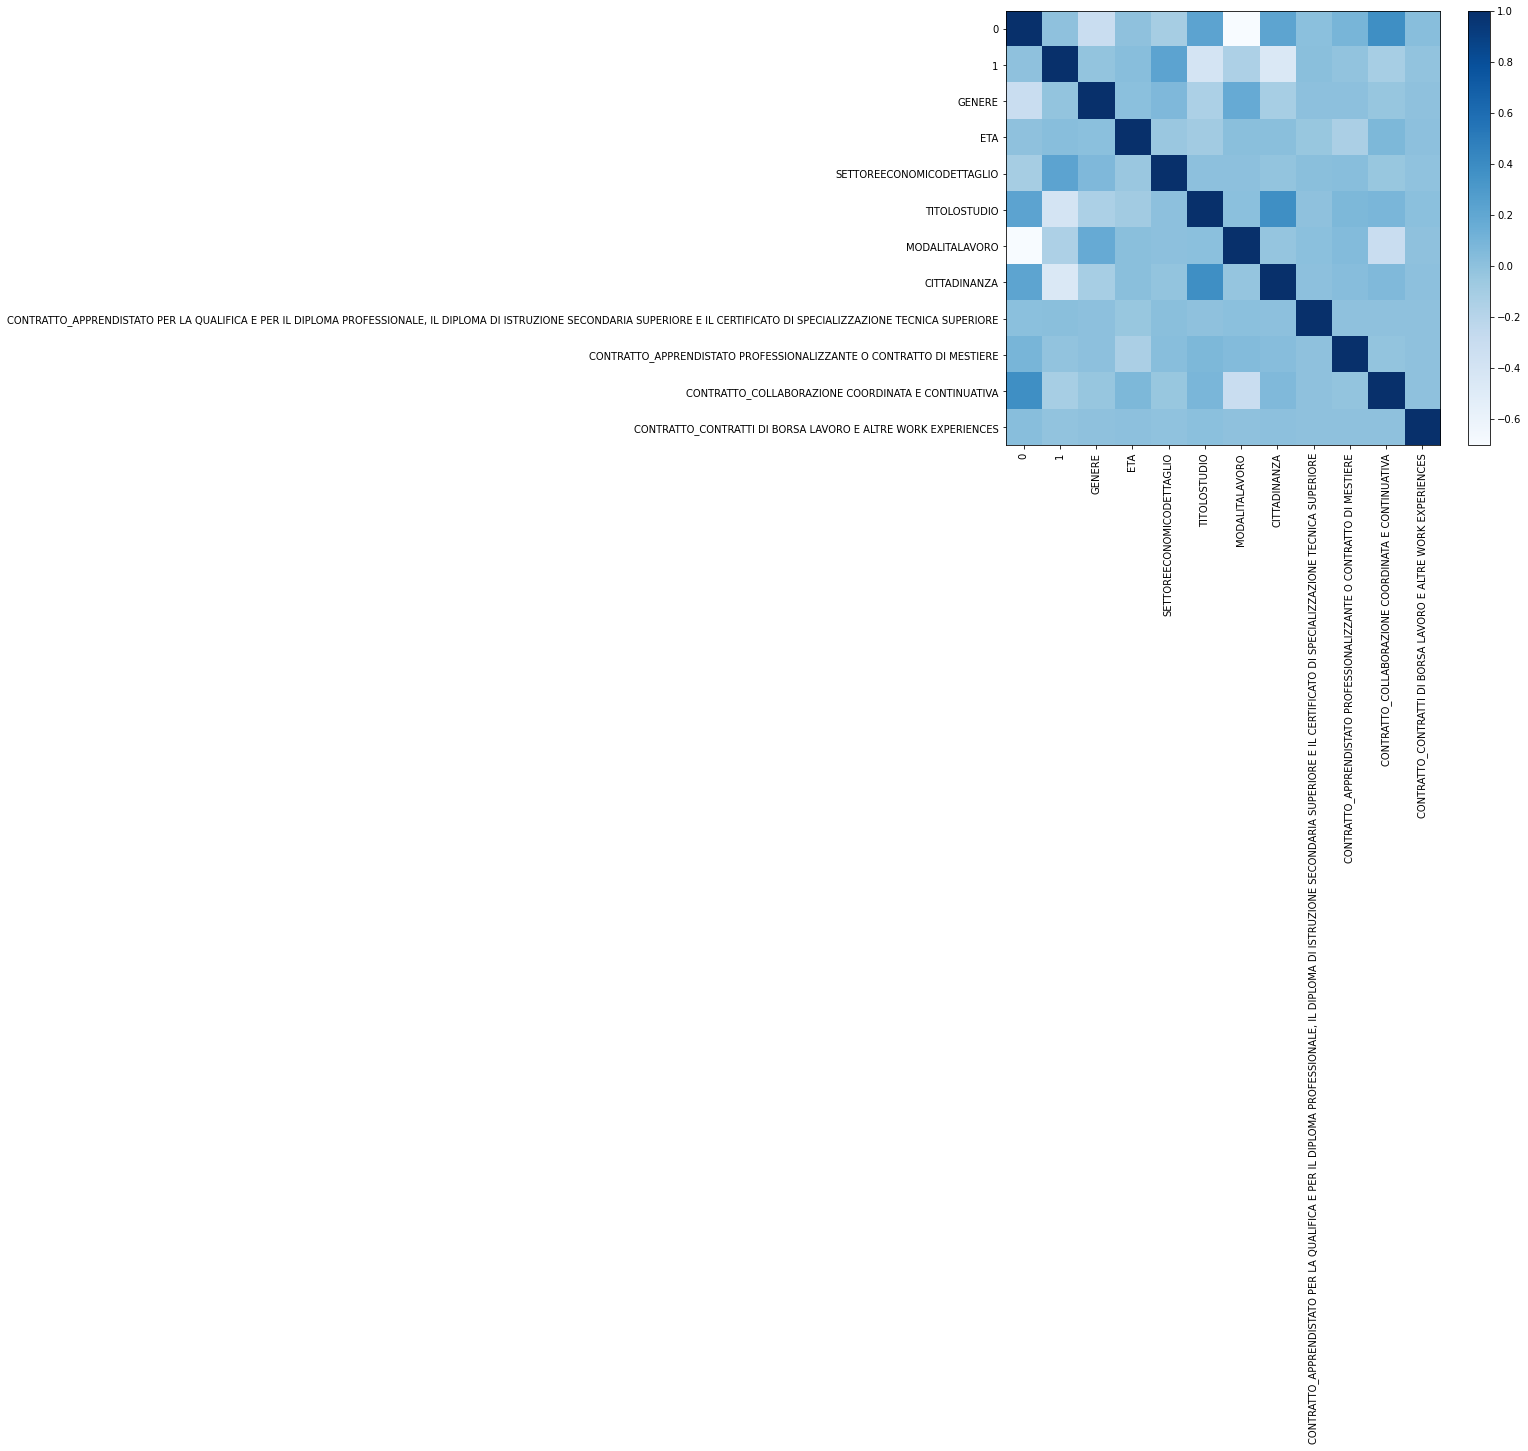

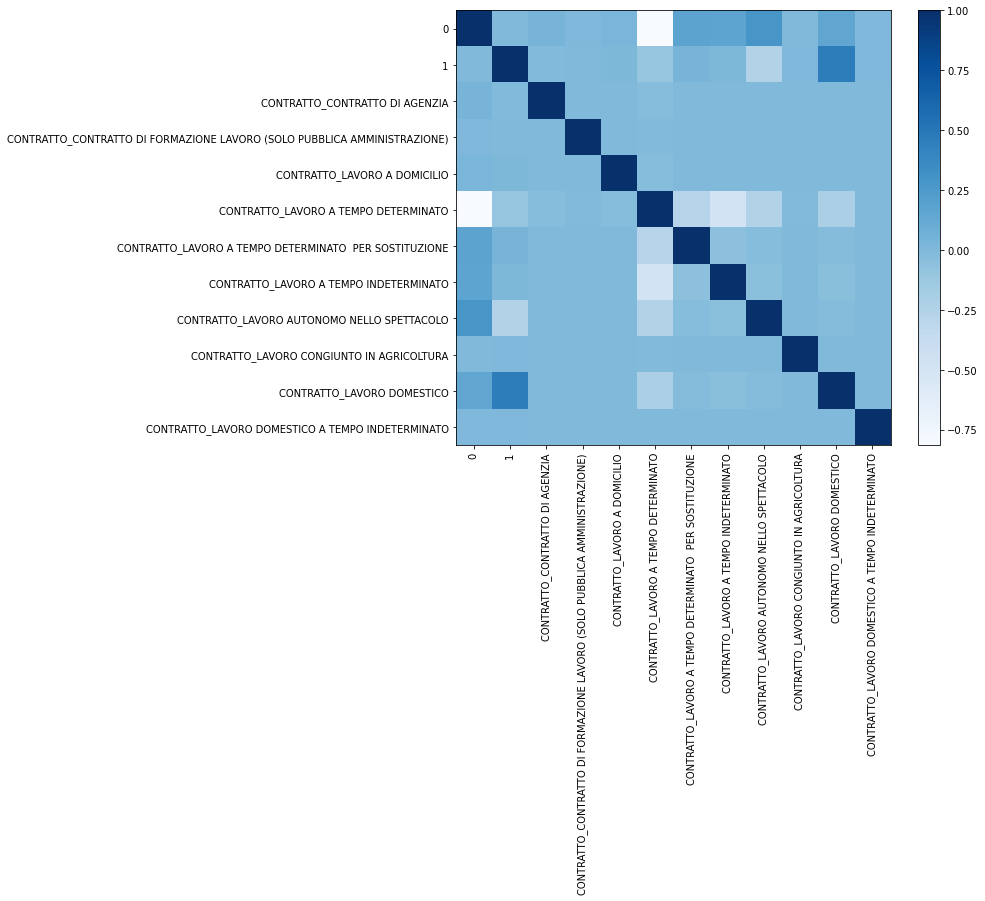

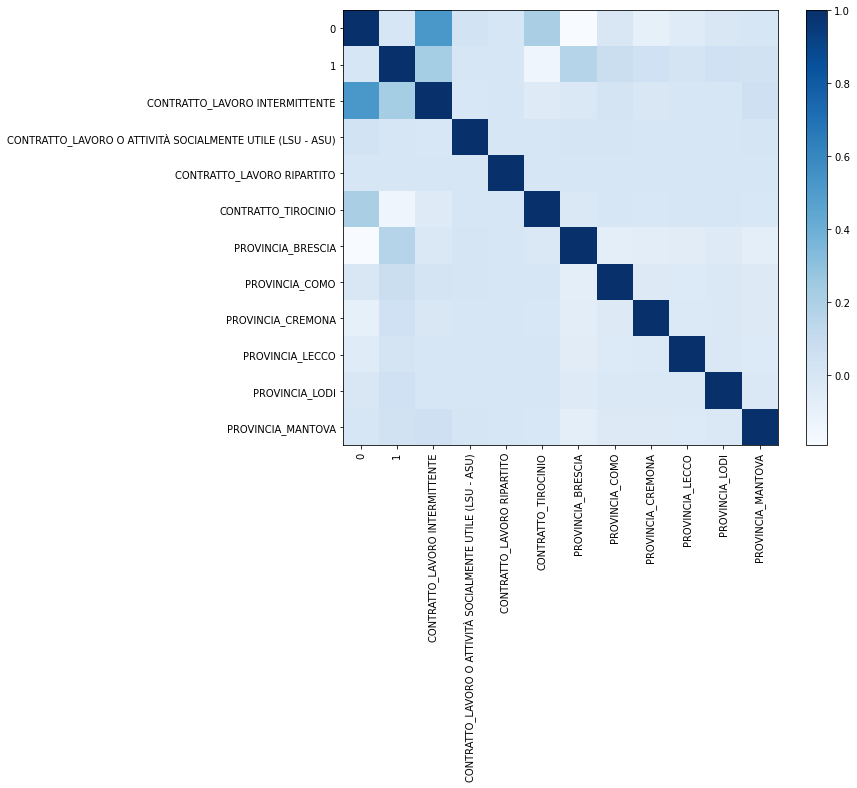

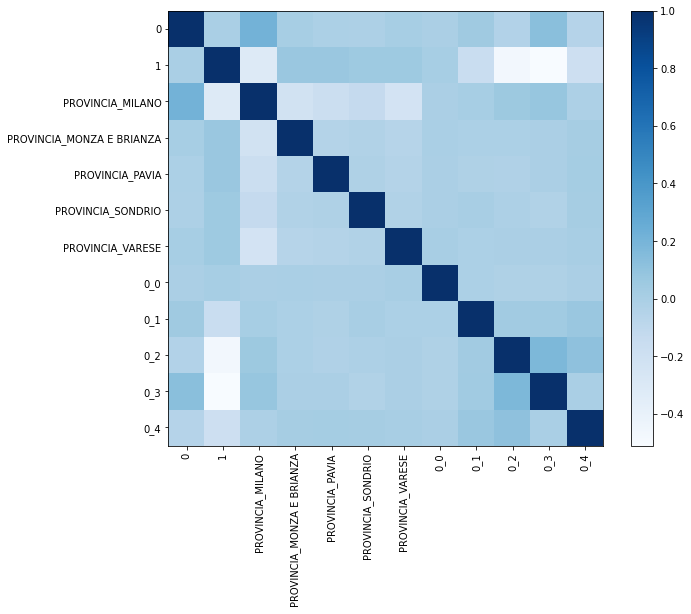

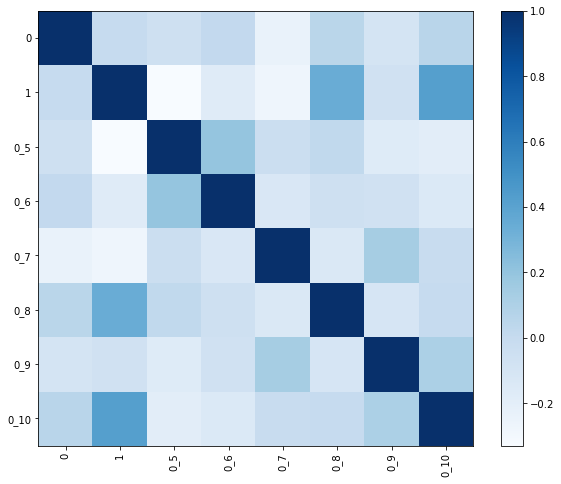

In [88]:
rows = [0,1]
for i in range(0,5):
    a = 2+(10*i)
    b = a + 10
    if b > 48:
        b = 48
    for j in list(range(a,b)):
        rows.append(j)
    print(rows)
    printPlot(df_corr,rows)
    rows = [0,1]

The two components are mainly influenced by the following features (the value indicates the correlation value)
- 0
    - pos : CONTRATTO_LAVORO INTERMITTENTE -- 0.52
    - neg : MODALITALAVORO -- -0.71 - CONTRATTO_LAVORO TEMPO DETERMINATO -- -0.82
- 1
    - pos : /
    - neg : 0_3 -- -0.51

In [89]:
len(contract_1819.SETTOREECONOMICODETTAGLIO[contract_1819['0_3'] > 0].unique().tolist())

550

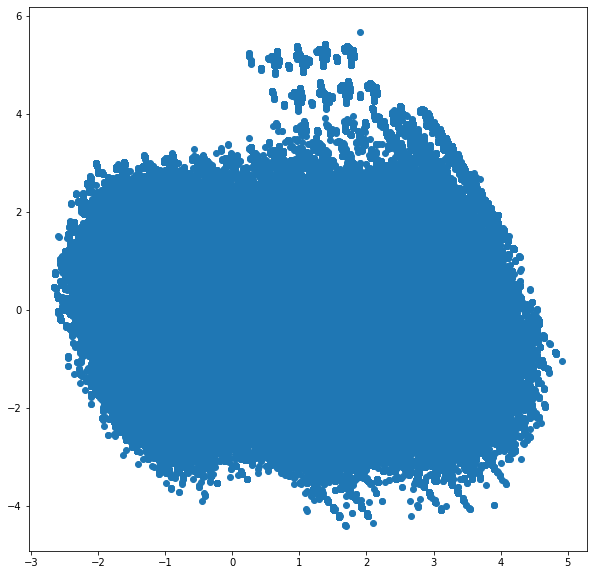

In [90]:
fig = plt.figure(figsize=(10,10))
plt.scatter(contract_1819_reduced[0], contract_1819_reduced[1])
plt.show()

Now we repeat the same process for 2020-2021

Check features with the same values

In [91]:
ttt = []
for i in range(0,46):
    k = contract_2021[contract_2021.columns[i]].unique().tolist()
    if len(k)==1:
        ttt.append(i)

contract_2021 = contract_2021.drop(contract_2021.columns[ttt], axis=1)
contract_2021 

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,...,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10
0,0,3,176,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,2,1041,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,483,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,1,1097,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2,483,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903752,1,1,1134,2,1,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
1903753,1,2,1013,4,2,1,0,0,0,0,...,0,0,0,0,1,0,1,1,1,1
1903754,0,3,541,2,2,1,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
1903755,0,3,79,2,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Normalize values

In [92]:
contract_2021 = scaleFeaturesDF(contract_2021)
contract_2021

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,...,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10
0,0.000000,4.602601,0.468125,0.000000,2.987681,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000051
1,0.000000,3.068401,2.768852,1.126241,0.000000,2.275039,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.032099,0.000000
2,2.013324,1.534200,1.284684,1.126241,2.987681,2.275039,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.032099,2.000051
3,2.013324,1.534200,2.917801,1.126241,0.000000,2.275039,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.024463,0.000000,0.000000
4,2.013324,3.068401,1.284684,1.126241,2.987681,2.275039,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.032099,2.000051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903752,2.013324,1.534200,3.016214,1.126241,1.493840,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,2.095288,2.000609,2.035905,0.000000,0.000000,0.000000,2.000051
1903753,2.013324,3.068401,2.694378,2.252482,2.987681,2.275039,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,2.000609,0.000000,2.036104,2.024463,2.032099,2.000051
1903754,0.000000,4.602601,1.438952,1.126241,2.987681,2.275039,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,2.035905,2.036104,2.024463,2.032099,2.000051
1903755,0.000000,4.602601,0.210124,1.126241,2.987681,2.275039,0.0,0.0,0.0,0.0,...,0.0,0.0,2.124861,2.095288,0.000000,0.000000,0.000000,0.000000,2.032099,2.000051


Reduce with PCA

In [93]:
pca = PCA(copy=True, n_components=2, svd_solver='full', whiten=False)
T = pca.fit_transform(contract_2021)
contract_2021_reduced = pd.DataFrame(T)
contract_2021_reduced

,0,1
0,4.617212,-0.367565
1,2.573389,2.518468
2,0.197569,-1.112822
3,2.849773,2.014423
4,0.287257,-1.109515
...,...,...
1903752,0.306154,-1.478789
1903753,-0.712099,-1.314828
1903754,0.007244,-0.799249
1903755,-0.001527,1.081780


Check correlation with original attributes

In [94]:
df_corr = pd.concat([contract_2021_reduced, contract_2021], axis = 1)
df_corr = df_corr.corr()
df_corr

,0,1,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,...,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10
0,1.000000e+00,1.476283e-13,-0.108888,0.087330,-0.025968,-0.359400,-0.293680,-0.385951,0.010488,-0.004095,...,-0.174161,-0.410155,-0.442137,-0.456058,-0.404585,-0.258066,-0.194287,-0.063563,-0.442221,-0.046828
1,1.476283e-13,1.000000e+00,-0.281703,0.003182,-0.187986,0.350073,-0.616554,0.369945,0.001769,0.084270,...,0.150779,0.174960,0.212907,0.041304,-0.143157,0.029912,0.044931,-0.055885,0.015191,0.045305
GENERE,-1.088880e-01,-2.817027e-01,1.000000,-0.006702,0.049279,-0.154483,0.164375,-0.129635,0.010686,0.003540,...,0.020088,0.042118,-0.007681,0.033049,0.045480,0.009456,-0.048838,0.028993,0.051714,-0.073831
ETA,8.732957e-02,3.182047e-03,-0.006702,1.000000,-0.059927,-0.098479,0.002376,0.000937,-0.047207,-0.129896,...,0.008547,0.017758,-0.020652,-0.049837,0.006221,-0.046448,-0.004969,-0.021454,0.028321,0.014656
SETTOREECONOMICODETTAGLIO,-2.596750e-02,-1.879856e-01,0.049279,-0.059927,1.000000,0.056786,0.004988,0.010709,0.014464,0.015213,...,0.011004,-0.088765,-0.206793,-0.019839,0.066435,0.068024,0.076026,0.064050,-0.129026,-0.106464
TITOLOSTUDIO,-3.594003e-01,3.500734e-01,-0.154483,-0.098479,0.056786,1.000000,-0.001686,0.415620,-0.003677,0.075162,...,0.076742,0.044333,0.093398,0.022886,0.019314,0.106519,0.108131,0.030344,-0.020001,-0.103343
MODALITALAVORO,-2.936796e-01,-6.165543e-01,0.164375,0.002376,0.004988,-0.001686,1.000000,-0.047229,0.015554,0.047720,...,0.010730,0.062253,-0.004111,0.039842,0.104323,0.011904,-0.014709,0.026979,0.056115,-0.032012
CITTADINANZA,-3.859505e-01,3.699447e-01,-0.129635,0.000937,0.010709,0.415620,-0.047229,1.000000,0.008398,0.041071,...,0.058037,0.125476,0.133090,0.083016,0.027969,0.055946,0.051361,0.028849,0.039499,-0.051087
"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",1.048817e-02,1.769344e-03,0.010686,-0.047207,0.014464,-0.003677,0.015554,0.008398,1.000000,-0.004701,...,-0.004694,-0.005746,-0.007981,-0.005222,-0.003500,-0.003850,0.007182,-0.003546,0.000948,-0.008375
CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,-4.094538e-03,8.427041e-02,0.003540,-0.129896,0.015213,0.075162,0.047720,0.041071,-0.004701,1.000000,...,0.002099,-0.012825,0.010191,-0.015262,-0.014056,-0.002051,0.012122,0.010456,-0.001422,-0.021232


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[0, 1, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
[0, 1, 42, 43, 44, 45, 46, 47, 48, 49, 50]


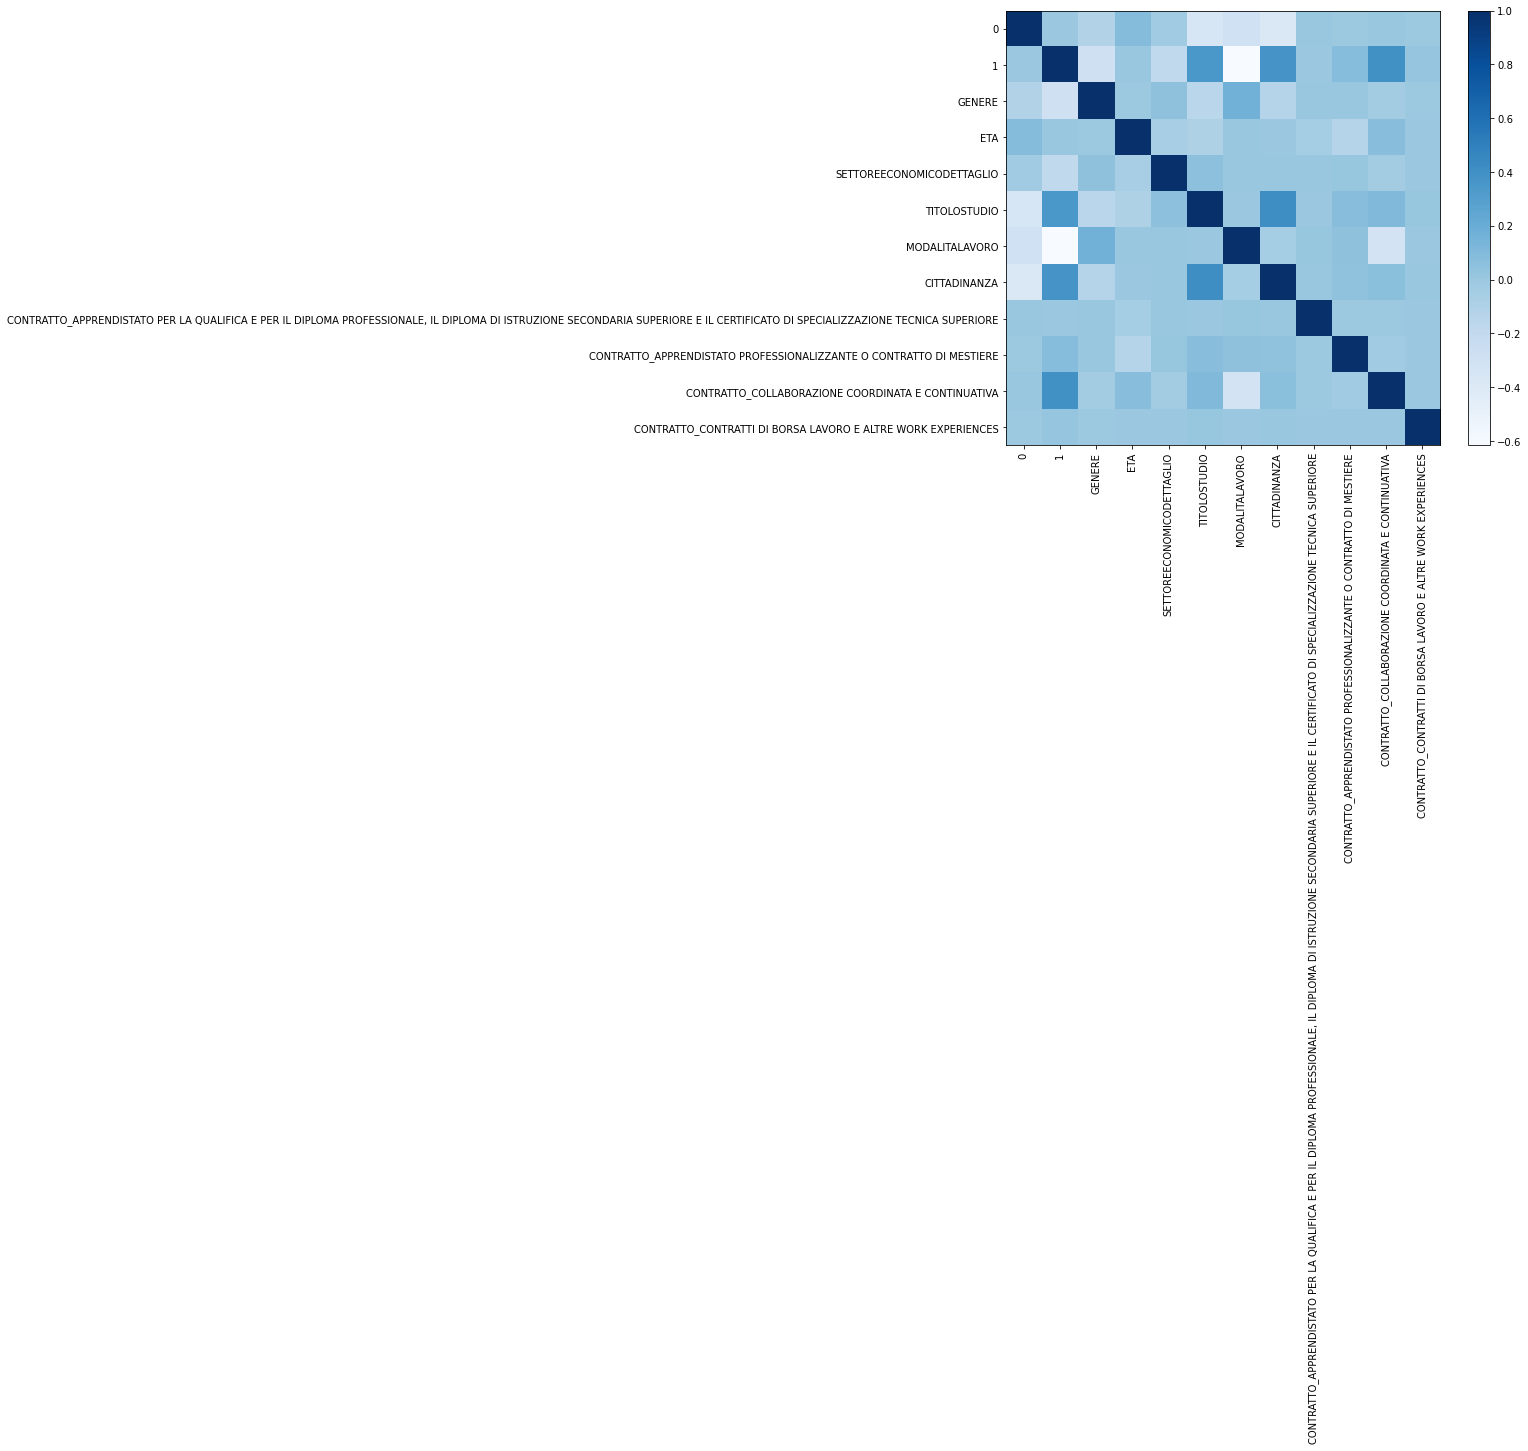

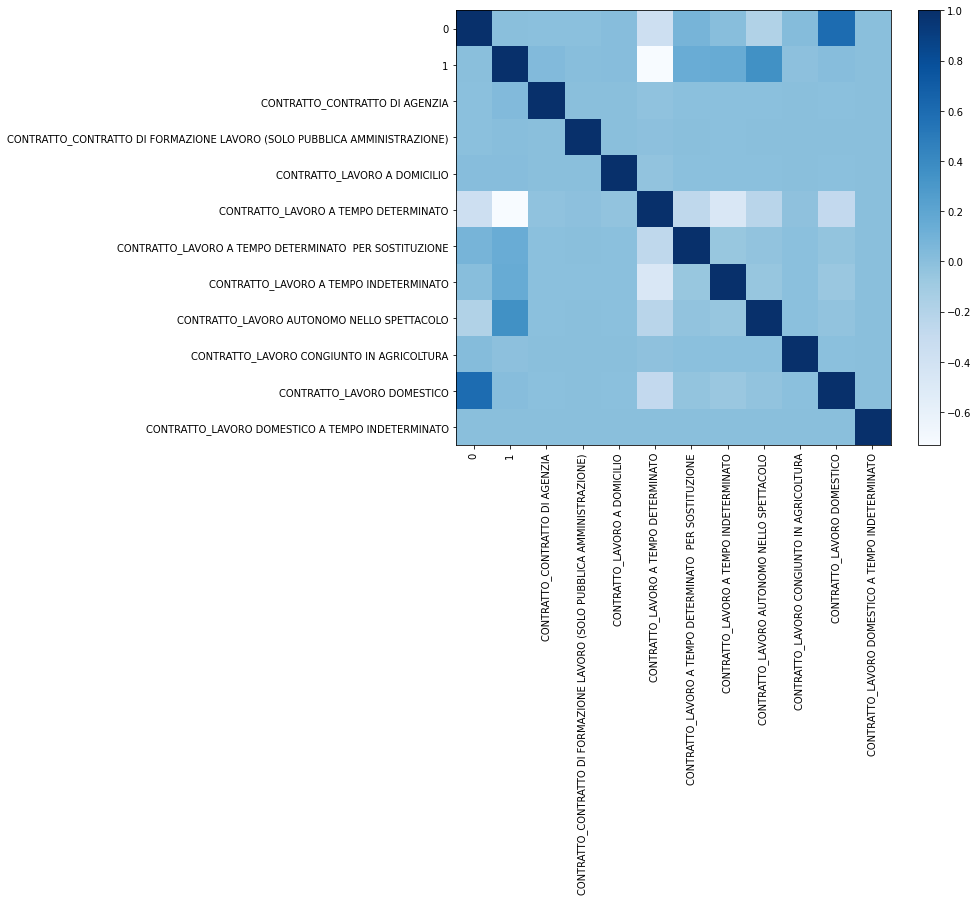

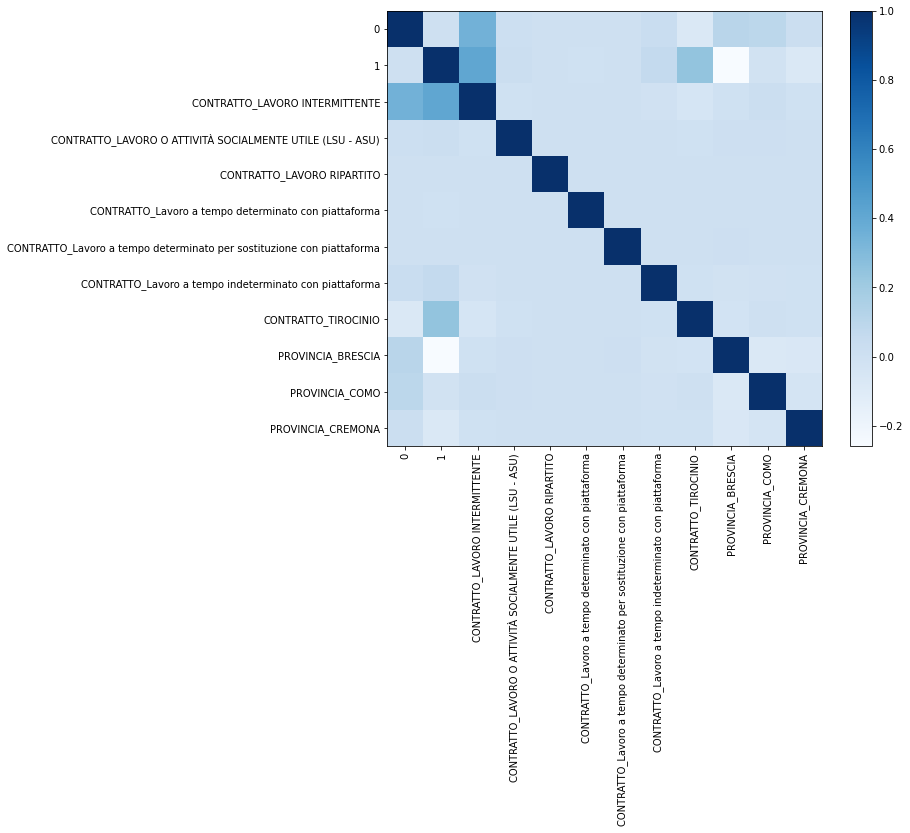

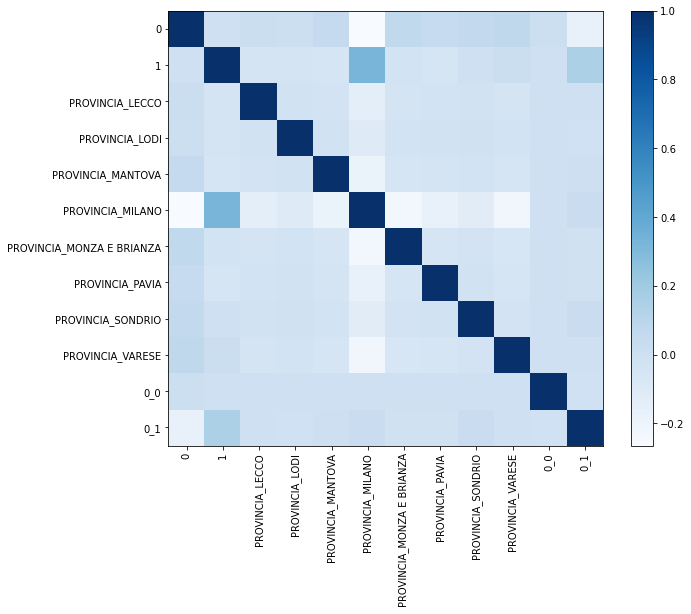

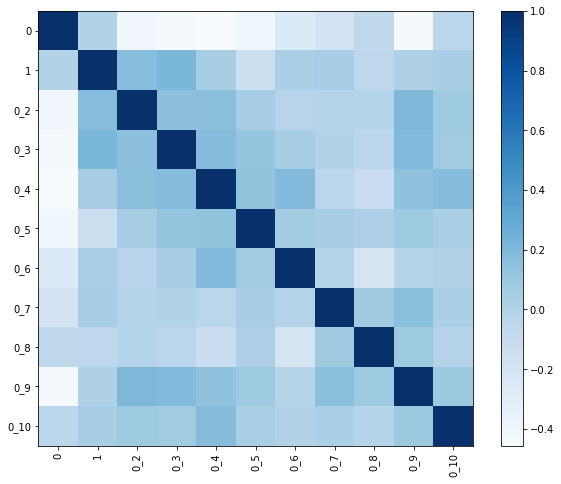

In [95]:
rows = [0,1]
for i in range(0,5):
    a = 2+(10*i)
    b = a + 10
    if b > 51:
        b = 51
    for j in list(range(a,b)):
        rows.append(j)
    print(rows)
    printPlot(df_corr,rows)
    rows = [0,1]

The two components are mainly influenced by the following features (the value indicates the correlation value)
- 0
    - pos : CONTRATTO_LAVORO DOMESTICO -- 0.60
    - neg : /
- 1
    - pos : /
    - neg : MODALITALAVORO -- -0.62 - CONTRATTO_LAVORO TEMPO DETERMINATO -- -0.73

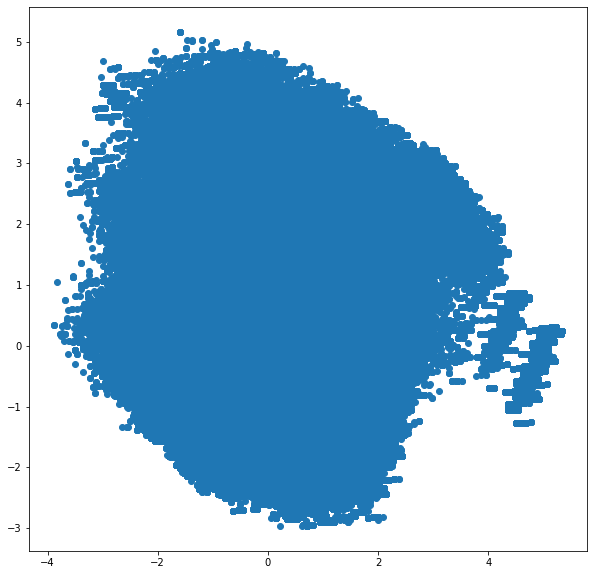

In [96]:
fig = plt.figure(figsize=(10,10))
plt.scatter(contract_2021_reduced[0], contract_2021_reduced[1])
plt.show()

Save the reduced datasets

In [97]:
output_red_1819 = "C:\\Users\\rotol\\Downloads\\csvs\\contracts_reduced_1819.csv"
output_red_2021 = "C:\\Users\\rotol\\Downloads\\csvs\\contracts_reduced_2021.csv"

contract_1819_reduced = contract_1819_reduced.rename(columns={0:"Component 1", 1:"Component 2"})
contract_1819_reduced.to_csv(output_red_1819, index=False)

contract_2021_reduced = contract_2021_reduced.rename(columns={0:"Component 1", 1:"Component 2"})
contract_2021_reduced.to_csv(output_red_2021, index=False)

print('Done')

Done
